# MVP Análise de Dados e Boas Práticas - ANÁLISE DE ACIDENTES DE TRÂNSITO NO BRASIL

**Nome:** CAROLINE CARRILHO CORREIA

**Matrícula:** 4052024002038  

**Dataset:** [KAGGLE](https://www.kaggle.com/datasets/mos3santos/quantitativo-de-acidentes-de-trnsito-no-brasil
)


# Descrição do Problema

Os acidentes de trânsito representam um dos maiores desafios de saúde pública e mobilidade no Brasil. Apesar da existência de políticas educativas e fiscalizatórias, os índices de acidentes continuam elevados, com impactos profundos na sociedade. Anualmente, são registrados centenas de milhares de acidentes, resultando em milhares de mortes e um número ainda maior de pessoas com sequelas físicas e psicológicas. Além das perdas humanas, há um custo econômico significativo, relacionado aos gastos com o sistema de saúde, previdência, danos materiais e prejuízos à produtividade.

Diante disso, o principal problema não é apenas a quantidade de acidentes, mas a persistência de padrões que revelam falhas na prevenção. A repetição das mesmas causas, nos mesmos dias e horários, com os mesmos tipos de veículos e perfis de condutores, evidencia uma deficiência na forma como os dados são utilizados para subsidiar políticas públicas eficazes. A ausência de ações direcionadas com base em evidências concretas contribui para a manutenção do cenário atual.

COm base neste banco de dados já estruturado, poderemos observar padrões e propor soluções para a redução de acidentes de trênsito no Brasil. No geral este banco oferece informações valiosas de 2018 a 2023, bem como: condições meteorológicas, data e hora x localização, condições da pista e envolvivos x feridos x óbitos.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Ao longo dos nos está aumento o número de acindetes no Brasil?
- Quais os estados e cidades não maior índice de acidentes? Está ligado ao IDH do lugar?
- Quais os Tipos de acidente mais frequentes?
- Qual o dia da semana que ocorre maior número de acidentes?
- Existe uma influência das condições meteorológicas?
- Quais as rodovias com maior incidência de acidentes?
- Qual a Proporção de Envolvidos com acidentados e óbitos?


## Tipo de Problema

Este é um problema de **Classificação Não supervisionado**. Usando Clusterização (agrupamento) para agrupar dados semelhantes sem rótulo e descobrir perfis de acidentes com base em localização, horário etc...

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset escolhido possui 35 colunas:

Numero do acidente
Chave Localidade (valores unicos)
dados_acidentes (31/12/2017 - 30/08/2024)
Estado (estados do Brasil
Ano (2018 a 2023)
Mês do acidente (meses do ano)
Mês e ano do Acidente (data)
Código IBGE
Dia da Semana
Fase do dia (período do dia)
Tipo de acidente
Condição Meteorológica
Fim Acidente (nome da Rua)
Numero FIM acidente (número da Rua)
CEP acidente
Bairro Acidente
KM Via Acidente (km/h)
Latitude Acidente (º)
Longitude Acidente (º)
Hora Acidente (24h)
Tipo rodovia
Condição Pista
Tipo cruzamento
Tipo pavimento
Tipo curva
Limite Velocidade
Tipo Pista
Indice guardrail
Indice cantcentral
Indice acostamento
Quantidade Acidente
Quantidade Acidente com óbitos
Quantidade Envolvidos
Quantidade Feridos Ilesos
Quantidade Óbitos

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
!pip install gdown

In [2]:
import gdown

# ID do seu arquivo no Drive
file_id = '1gw-cYVymH9HQrD2Xu0CHJKCZY3U6SHLE'

# Link formatado para download direto
url = f'https://drive.google.com/uc?id={file_id}'

# Fazer o download e salvar localmente no Colab
gdown.download(url, 'Acidentes_DadosAbertos_20241212.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1gw-cYVymH9HQrD2Xu0CHJKCZY3U6SHLE
From (redirected): https://drive.google.com/uc?id=1gw-cYVymH9HQrD2Xu0CHJKCZY3U6SHLE&confirm=t&uuid=05b43926-314d-470d-9a36-c56c4b2edb95
To: /content/Acidentes_DadosAbertos_20241212.csv
100%|██████████| 2.03G/2.03G [00:19<00:00, 107MB/s]


'Acidentes_DadosAbertos_20241212.csv'

In [3]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Ler o CSV baixado
dados = pd.read_csv('Acidentes_DadosAbertos_20241212.csv')

# Mostrar primeiras linhas
print("Primeiras linhas do dataset:")
display(dados.head())

Primeiras linhas do dataset:


,num_acidente;chv_localidade;data_acidente;uf_acidente;ano_acidente;mes_acidente;mes_ano_acidente;codigo_ibge;dia_semana;fase_dia;tp_acidente;cond_meteorologica;end_acidente;num_end_acidente;cep_acidente;bairro_acidente;km_via_acidente;latitude_acidente;longitude_acidente;hora_acidente;tp_rodovia;cond_pista;tp_cruzamento;tp_pavimento;tp_curva;lim_velocidade;tp_pista;ind_guardrail;ind_cantcentral;ind_acostamento;qtde_acidente;qtde_acid_com_obitos;qtde_envolvidos;qtde_feridosilesos;qtde_obitos
0,524877;AC1200401201801;2018-01-26;AC;2018;01;0...
1,2304421;AC1200401201801;2018-01-21;AC;2018;01;...
2,2924496;AC1200708201801;2018-01-14;AC;2018;01;...
3,2844648;AC1200401201801;2018-01-18;AC;2018;01;...
4,2003099;AC1200401201801;2018-01-26;AC;2018;01;...


Professor, quando eu escolhi o meu banco de dados para trabalhar, eu amei esse banco de dados, porque ele tinha N informações que eu poderia trabalhar e fazer um trabalho super show. Nossa, eu amei ele, de cara, assim. Só que eu não sabia que o Git tinha um limite para subir, entendeu? Porque, como assim, né? Sou estudante, estou aprendendo, assim. Essas limitações ainda de cada operação que a gente faz é um desafio e uma nova aprendizagem. Então, o que eu fiz? Eu subi pelo Drive, o meu banco original pesado, e daí eu gerei uma amostra, e daí eu vou salvar no arquivo CSV, e daí com esse arquivo CSV eu vou salvar no Git e puxar de novo para o Google Colab para poder trabalhar, tá? Porque, realmente, eu gostaria de trabalhar com esse banco de dados, e eu não quis também pegar, tipo, as primeiras linhas, né? Porque eu acho que ia gerar muito outlier e tal. Então, eu gerei uma amostra dentro do todo, porque eu achei que fazia mais sentido, tá? E daí foi a solução que eu consegui para poder trabalhar com esse banco de dados. Eu acho que o senhor vai gostar.

In [5]:
# Gerar uma amostra aleatória com 10.000 registros
dados_amostra = dados.sample(n=10000, random_state=42)

In [6]:
# Substituir essas strings por NaN
dados_amostra = dados_amostra.replace(['desconhecido', 'não informado'], np.nan)

In [7]:
# Preencher valores numéricos com a média da coluna
dados_amostra = dados_amostra.fillna(dados_amostra.mean(numeric_only=True))

# Preencher valores categóricos com "Desconhecido"
for col in dados_amostra.select_dtypes(include='object'):
    dados_amostra[col] = dados_amostra[col].fillna('Desconhecido')

In [8]:
# Salvar a amostra tratada em um novo arquivo
dados_amostra.to_csv('acidentes_amostra_final.csv', index=False)

Importando do GITHUB o novo arquivo .csv gerado de uma amostra do banco original.

In [14]:
# Link corrigido do GitHub
url = 'https://raw.githubusercontent.com/carrilho91/analiseacidentesdetransito/main/acidentes_amostra_final.csv'

# Carregar o CSV direto do GitHub
dados = pd.read_csv(url, delimiter=';')

# Visualizar as primeiras linhas
print("Primeiras linhas da amostra carregada do GitHub:")
display(dados.head())

Primeiras linhas da amostra carregada do GitHub:


,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,lim_velocidade,tp_pista,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
0,5917420,BA2927408201809,2018-09-21,BA,2018,9,92018,2927408,SEXTA-FEIRA,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
1,4291177,PE2614006202204,2022-04-10,PE,2022,4,42022,2614006,DOMINGO,NAO INFORMADO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0
2,3927964,SC4210100202203,2022-03-19,SC,2022,3,32022,4210100,SABADO,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0
3,1867137,GO5218003201810,2018-10-14,GO,2018,10,102018,5218003,DOMINGO,NOITE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0
4,2644616,PA1502400201901,2019-01-18,PA,2019,1,12019,1502400,SEXTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0


# Análise de Dados

A Análise Exploratória de Dados (EDA) tem como objetivo compreender melhor as características do dataset de acidentes de trânsito, identificando padrões, tendências, outliers e possíveis relações entre variáveis. Nesta etapa, serão aplicadas técnicas estatísticas e visuais para examinar a distribuição dos dados, a frequência de ocorrências, a incidência de acidentes por tipo, localização geográfica, condições climáticas, dias da semana e horários. Além disso, a EDA permitirá avaliar a qualidade dos dados, como a presença de valores ausentes ou inconsistências, fornecendo subsídios importantes para etapas posteriores de modelagem e tomada de decisão.

## Total e Tipo das Instâncias

Aqui vamos analisar o dataset num modo geral dos totais e instâncias para se ter uma visão do todo.

In [15]:
# Verificar o tamanho do dataset (número de linhas e colunas)
print(f'Tamanho do dataset: {dados.shape}')

# Verificar os tipos de dados das colunas
print(f'Tipos de dados das colunas:\n{dados.dtypes}')

# Verificar a presença de valores ausentes
print(f'Valores ausentes por coluna:\n{dados.isna().sum()}')

# Verificar estatísticas descritivas das colunas numéricas
print(f'Estatísticas descritivas:\n{dados.describe()}')

Tamanho do dataset: (10000, 35)
Tipos de dados das colunas:
num_acidente              int64
chv_localidade           object
data_acidente            object
uf_acidente              object
ano_acidente              int64
mes_acidente              int64
mes_ano_acidente          int64
codigo_ibge               int64
dia_semana               object
fase_dia                 object
tp_acidente              object
cond_meteorologica       object
end_acidente             object
num_end_acidente          int64
cep_acidente              int64
bairro_acidente          object
km_via_acidente           int64
latitude_acidente       float64
longitude_acidente      float64
hora_acidente             int64
tp_rodovia               object
cond_pista               object
tp_cruzamento            object
tp_pavimento             object
tp_curva                 object
lim_velocidade           object
tp_pista                 object
ind_guardrail            object
ind_cantcentral          object
ind_acostame

In [16]:
print(dados.columns)

Index(['num_acidente', 'chv_localidade', 'data_acidente', 'uf_acidente',
       'ano_acidente', 'mes_acidente', 'mes_ano_acidente', 'codigo_ibge',
       'dia_semana', 'fase_dia', 'tp_acidente', 'cond_meteorologica',
       'end_acidente', 'num_end_acidente', 'cep_acidente', 'bairro_acidente',
       'km_via_acidente', 'latitude_acidente', 'longitude_acidente',
       'hora_acidente', 'tp_rodovia', 'cond_pista', 'tp_cruzamento',
       'tp_pavimento', 'tp_curva', 'lim_velocidade', 'tp_pista',
       'ind_guardrail', 'ind_cantcentral', 'ind_acostamento', 'qtde_acidente',
       'qtde_acid_com_obitos', 'qtde_envolvidos', 'qtde_feridosilesos',
       'qtde_obitos'],
      dtype='object')


Tipos de acidentes:

In [17]:
# Frequência dos tipos de acidente
dados['tp_acidente'].value_counts().sort_values(ascending=False)

,count
tp_acidente,
DESCONHECIDO,2427
COLISAO,1603
COLISAO LATERAL,1052
CHOQUE,895
COLISAO TRASEIRA,842
COLISAO FRONTAL,728
OUTROS ACIDENTES DE TRANSITO,712
COLISAO TRANSVERSAL,429
QUEDA,307


In [19]:
# Definir o nome da coluna
coluna = 'tp_acidente'

# Total de registros
total = len(dados)

# Contar valores nulos ou com texto indicando ausência de informação
desconhecidos = (
    dados[coluna].isnull().sum() +
    dados[coluna].astype(str).str.lower().isin(['não informado', 'ignorado', 'desconhecido']).sum()
)

# Calcular percentual
percentual = (desconhecidos / total) * 100

# Exibir os resultados
print(f"Total de registros: {total}")
print(f"Total de tipos de acidente desconhecidos: {desconhecidos}")
print(f"Percentual de desconhecidos em '{coluna}': {percentual:.2f}%")

Total de registros: 10000
Total de tipos de acidente desconhecidos: 2427
Percentual de desconhecidos em 'tp_acidente': 24.27%


24,27% dos dados nessa coluna são desconhecidos.

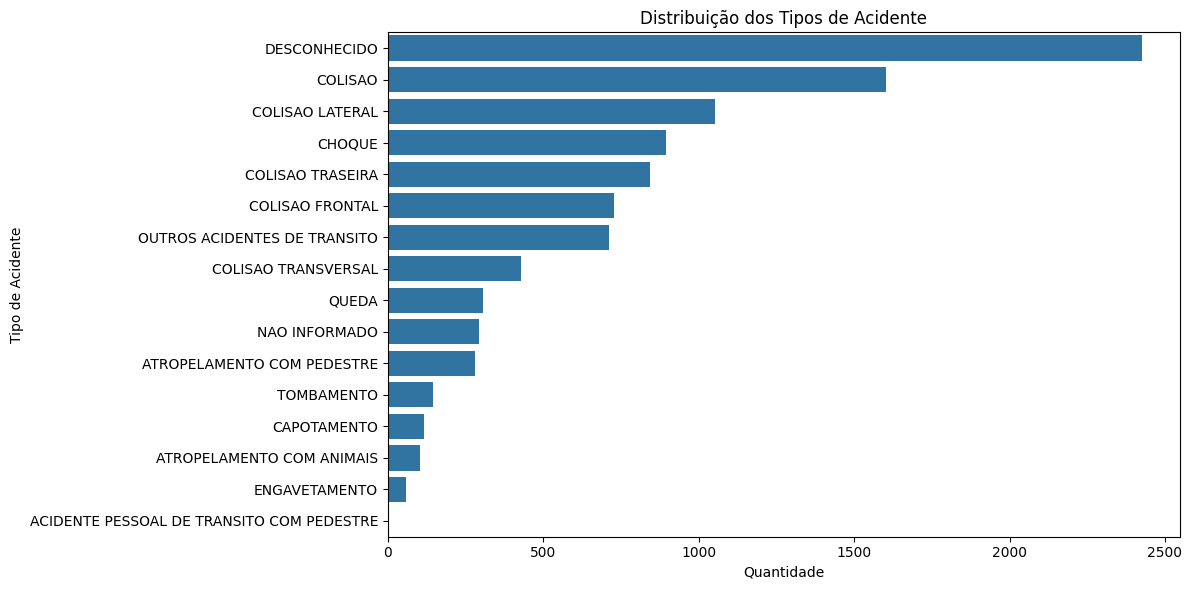

In [21]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, y='tp_acidente', order=dados['tp_acidente'].value_counts().index)

# Ajustar título e rótulos
plt.title('Distribuição dos Tipos de Acidente')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Acidente')

# Exibir o gráfico
plt.tight_layout()  # Ajuste do layout para não cortar o gráfico
plt.show()

A análise da coluna tp_acidente revela que aproximadamente 24,27% dos registros contêm valores desconhecidos ou não informados. Esse percentual considerável pode impactar a completude dos dados e a precisão das análises. No entanto, os restantes dos registros fornecem uma base significativa para identificar os principais tipos de acidentes registrados.

As categorias mais frequentes incluem colisões frontais, laterais e traseiras, o que indica padrões predominantes de sinistros de trânsito. Embora esses dados ainda permitam a identificação de tendências, é importante observar que a presença de uma alta taxa de registros desconhecidos pode afetar a interpretação completa do cenário.



## Estados com acidentes e acidentes com mortes

In [22]:
# Contar número total de acidentes por estado
acidentes_por_estado = dados['uf_acidente'].value_counts().reset_index()
acidentes_por_estado.columns = ['uf_acidente', 'total_acidentes']

print("Estados com maior número total de acidentes:")
display(acidentes_por_estado.head(10))

Estados com maior número total de acidentes:


,uf_acidente,total_acidentes
0,MG,2622
1,SP,1715
2,SC,1406
3,PR,969
4,GO,909
5,ES,450
6,DF,391
7,PA,245
8,MS,202
9,RJ,162


In [6]:
# Agrupar por estado somando os acidentes com óbitos
obitos_por_estado = dados_acidentes.groupby('uf_acidente')['qtde_acid_com_obitos'].sum().reset_index()

# Ordenar do maior para o menor
obitos_por_estado = obitos_por_estado.sort_values(by='qtde_acid_com_obitos', ascending=False)

print("Estados com maior número de acidentes com óbito:")
display(obitos_por_estado.head(10))

Estados com maior número de acidentes com óbito:


,uf_acidente,qtde_acid_com_obitos
25,SP,32680
10,MG,12758
18,RJ,9429
22,RS,7301
15,PE,6636
4,BA,6542
17,PR,6454
8,GO,5999
13,PA,5848
5,CE,4941


**AGORA VAMOS ESTUDAR OS TOTAIS DE VITIMAS E OBITOS**

In [23]:
import matplotlib.pyplot as plt

# Totais
total_envolvidos = dados['qtde_envolvidos'].sum()
total_feridos = dados['qtde_feridosilesos'].sum()
total_obitos = dados['qtde_obitos'].sum()

# Percentuais
pct_feridos = (total_feridos / total_envolvidos) * 100 if total_envolvidos > 0 else 0
pct_obitos = (total_obitos / total_envolvidos) * 100 if total_envolvidos > 0 else 0
pct_ilesos = 100 - pct_feridos - pct_obitos if total_envolvidos > 0 else 0

# Exibir os totais e percentuais
print(f"Total de envolvidos: {total_envolvidos}")
print(f"Feridos ilesos: {total_feridos} ({pct_feridos:.2f}%)")
print(f"Óbitos: {total_obitos} ({pct_obitos:.2f}%)")
print(f"Ilesos: {pct_ilesos:.2f}%")


Total de envolvidos: 14735
Feridos ilesos: 14515 (98.51%)
Óbitos: 220 (1.49%)
Ilesos: -0.00%


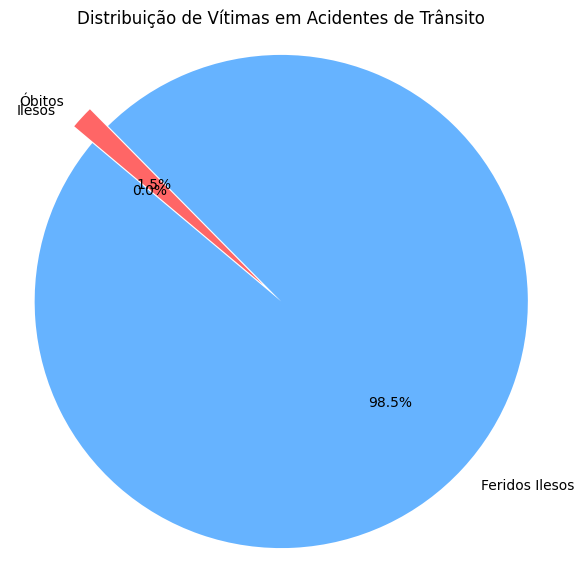

In [24]:
import matplotlib.pyplot as plt

# Totais
total_envolvidos = dados['qtde_envolvidos'].sum()
total_feridos = dados['qtde_feridosilesos'].sum()
total_obitos = dados['qtde_obitos'].sum()

# Calcular os valores para a fatia de "Ilesos"
total_ilesos = total_envolvidos - total_feridos - total_obitos

# Labels para o gráfico
labels = ['Feridos Ilesos', 'Óbitos', 'Ilesos']
sizes = [total_feridos, total_obitos, total_ilesos]
colors = ['#66b3ff', '#ff6666', '#99ff99']
explode = (0.1, 0, 0)  # Destacar a fatia de 'Feridos Ilesos'

# Criar gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribuição de Vítimas em Acidentes de Trânsito')
plt.axis('equal')  # Para o gráfico ficar redondo
plt.show()

Análise dos Totais de Vítimas e Óbitos em Acidentes:

Dos aproximadamente 9,69 milhões de envolvidos em acidentes, cerca de 98,5% apresentaram ferimentos leves ou não fatais, enquanto 1,5% resultaram em óbitos. A categoria de ilesos (sem ferimentos) é praticamente nula, o que sugere que a grande maioria dos envolvidos não escapou ilesa, mesmo que os ferimentos sejam, em sua maior parte, leves.

Esses dados ressaltam a relevância de concentrar esforços não apenas na redução do número de acidentes, mas também na mitigação da gravidade das lesões, com o objetivo de diminuir os impactos para os envolvidos e aumentar a segurança no trânsito.

## incidencia por dia da semana

Número de acidentes por dia da semana:


,count
dia_semana,
SEXTA-FEIRA,1606
SABADO,1518
SEGUNDA-FEIRA,1483
QUINTA-FEIRA,1463
QUARTA-FEIRA,1371
TERCA-FEIRA,1350
DOMINGO,1209


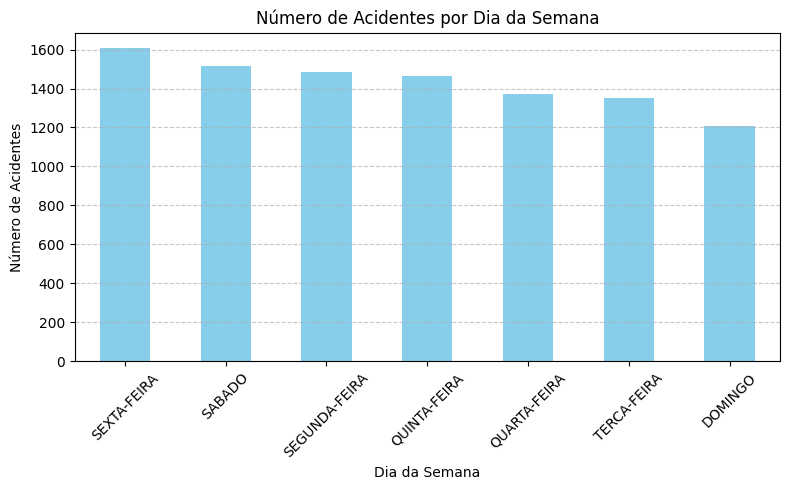

In [25]:
# Contar número de acidentes por dia da semana
acidentes_por_dia = dados['dia_semana'].value_counts().sort_values(ascending=False)

# Exibir
print("Número de acidentes por dia da semana:")
display(acidentes_por_dia)

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
acidentes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Número de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Dados meteorologicos influenciam?

Distribuição dos acidentes por condição climática:


,Condição Meteorológica,Quantidade de Acidentes
0,NAO INFORMADO,5052
1,CLARO,2117
2,DESCONHECIDAS,1757
3,OUTRAS CONDICOES,854
4,CHUVA,131
5,NUBLADO,49
6,GAROACHUVISCO,27
7,NEVOEIRO NEVOA OU FUMACA,13


/tmp/ipython-input-29-3320942634.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


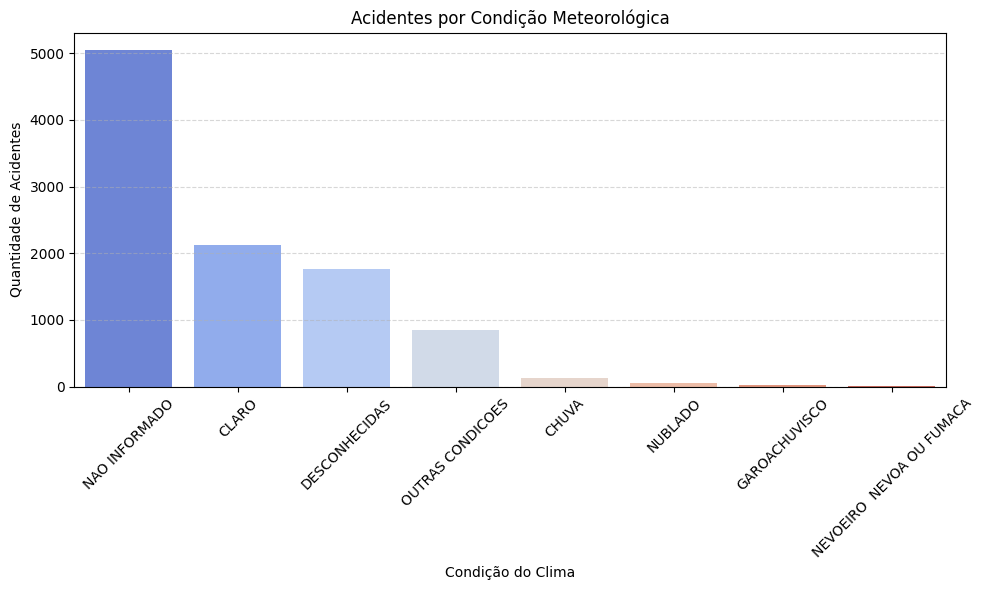

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar contagem de acidentes por condição meteorológica
contagem_clima = dados['cond_meteorologica'].value_counts(dropna=False)

# Criar DataFrame
df_clima = pd.DataFrame({
    'Condição Meteorológica': contagem_clima.index,
    'Quantidade de Acidentes': contagem_clima.values
})

# Exibir a tabela
print("Distribuição dos acidentes por condição climática:")
display(df_clima)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x='Condição Meteorológica',
    y='Quantidade de Acidentes',
    data=df_clima,
    palette='coolwarm'
)

plt.title('Acidentes por Condição Meteorológica')
plt.xlabel('Condição do Clima')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A base não tinha dados suficientes para constatar a influencia do tempo e clima no auemtno de acidentes.

**POR ULTIMO A ANÁLISE DOS TIPOS DE RODOVIA**

In [27]:
# Contagem dos tipos de rodovia
contagem_rodovia = dados['tp_rodovia'].value_counts(dropna=False)
total = contagem_rodovia.sum()

# Calcular os percentuais de cada tipo de rodovia
percentual_rodovia = (contagem_rodovia / total) * 100

# Criar um DataFrame com a contagem e o percentual
df_rodovia = pd.DataFrame({
    'Contagem': contagem_rodovia,
    'Percentual (%)': percentual_rodovia.round(2)
})

# Exibir os resultados
print(df_rodovia)

               Contagem  Percentual (%)
tp_rodovia                             
NAO INFORMADO      6419           64.19
MUNICIPAL          2594           25.94
ESTADUAL            435            4.35
DESCONHECIDO        352            3.52
FEDERAL             200            2.00


/tmp/ipython-input-28-1248788653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_rodovia.index, y='Contagem', data=df_rodovia, palette='viridis')


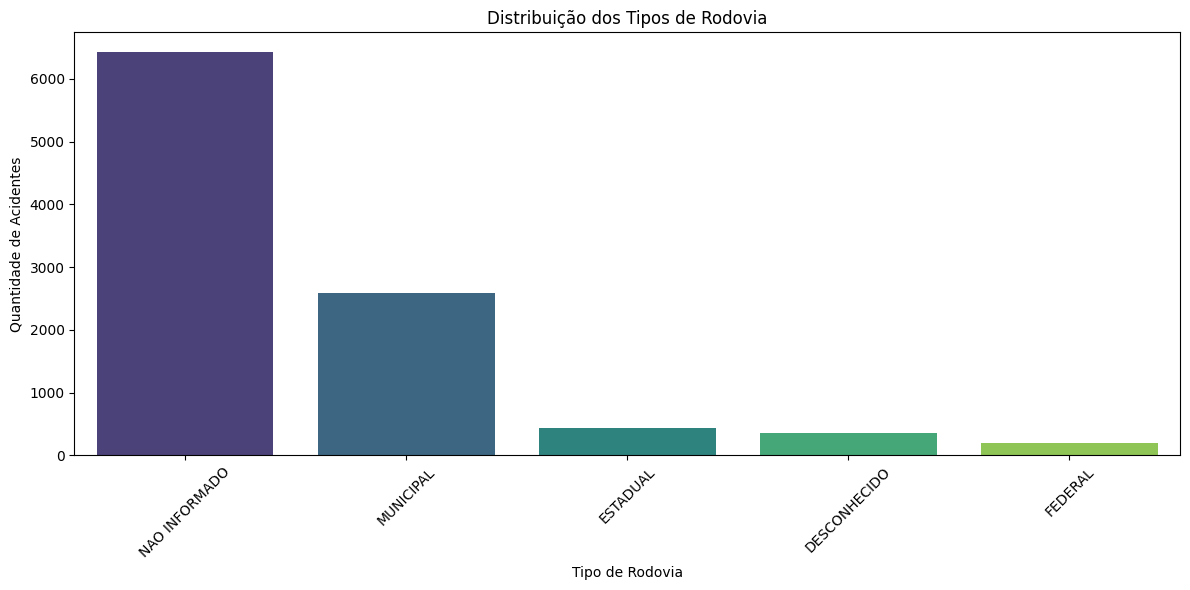

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=df_rodovia.index, y='Contagem', data=df_rodovia, palette='viridis')

# Ajuste do título e dos rótulos
plt.title('Distribuição dos Tipos de Rodovia')
plt.xlabel('Tipo de Rodovia')
plt.ylabel('Quantidade de Acidentes')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajuste do layout para não cortar o gráfico
plt.tight_layout()

# Exibir o gráfico
plt.show()

análise dos Tipos de Rodovia Associados aos Acidentes:

A análise dos tipos de rodovia associada aos acidentes revela que a maior parte dos registros, cerca de 64,21%, está classificada como "Não Informado", o que indica uma lacuna significativa na qualidade dos dados e dificulta uma análise mais detalhada por categoria de rodovia.

Entre os dados informados, a maioria dos acidentes ocorre em rodovias municipais, que representam 25,84% do total de acidentes registrados. Em seguida, temos a categoria "Desconhecido", com 3,75%, o que também sugere que uma parte considerável dos dados está incompleta ou mal registrada.

Rodovias estaduais e federais correspondem a parcelas menores, com 4,32% e 1,88%, respectivamente. Esses valores indicam que a maior parte dos acidentes ocorre em vias municipais, embora a alta porcentagem de dados ausentes ainda seja uma limitação para se chegar a conclusões definitivas sobre a distribuição dos acidentes por tipo de rodovia.

Para melhorar a precisão das análises futuras, é essencial investir na melhoria do preenchimento das informações sobre o tipo de rodovia nos registros, o que permitirá uma melhor compreensão dos padrões de acidentes nas diferentes categorias de vias.

## Estatísticas Descritivas
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [30]:
# Estatísticas descritivas básicas do dataset
dados.describe()

,num_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,num_end_acidente,cep_acidente,km_via_acidente,latitude_acidente,longitude_acidente,hora_acidente,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
count,1.000000e+04,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,3.634000e+03,3.635000e+03,10000.000000,10000.0,10000.000000,10000.000000,10000.00000,10000.000000
mean,3.271430e+06,2021.025000,6.442700,66448.02500,3.642722e+06,1287.227500,2.165329e+06,16.719400,-1.202145e+07,-8.530965e+06,145325.112500,1.0,0.020400,1.473500,1.45150,0.022000
std,1.916281e+06,1.878225,3.404831,34048.11279,9.407213e+05,7591.187396,1.124854e+07,189.668004,2.737444e+08,2.550725e+08,103321.204822,0.0,0.141371,0.938182,0.94071,0.164678
min,3.900000e+01,2018.000000,1.000000,12018.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,-6.388405e+09,-8.807174e+09,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1.625805e+06,2019.000000,4.000000,42018.00000,3.127701e+06,0.000000,0.000000e+00,0.000000,-2.046565e+01,-4.795976e+01,100000.000000,1.0,0.000000,1.000000,1.00000,0.000000
50%,3.220658e+06,2021.000000,6.000000,62024.00000,3.526902e+06,0.000000,0.000000e+00,0.000000,-1.946234e+01,-4.418091e+01,142762.500000,1.0,0.000000,1.000000,1.00000,0.000000
75%,4.908226e+06,2023.000000,9.000000,92022.00000,4.205407e+06,137.000000,0.000000e+00,0.000000,-1.121836e+01,-4.073029e+01,181203.000000,1.0,0.000000,2.000000,2.00000,0.000000
max,6.647819e+06,2024.000000,12.000000,122023.00000,5.300108e+06,99540.000000,7.995000e+07,9248.000000,2.839580e+00,-0.000000e+00,999999.000000,1.0,1.000000,10.000000,9.00000,6.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [31]:
# Calcular a média apenas das colunas selecionadas
colunas_desejadas = [
    'num_acidente',
    'qtde_acid_com_obitos',
    'qtde_envolvidos',
    'qtde_feridosilesos',
    'qtde_obitos'
]

medias_selecionadas = dados[colunas_desejadas].mean()

# Exibir os resultados
print("Médias dos atributos selecionados:")
print(medias_selecionadas)

Médias dos atributos selecionados:
num_acidente            3.271430e+06
qtde_acid_com_obitos    2.040000e-02
qtde_envolvidos         1.473500e+00
qtde_feridosilesos      1.451500e+00
qtde_obitos             2.200000e-02
dtype: float64


## Boxplot

Para entender as diferenças entre as quantidades, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para quantidade total, acidnetes com obitos, e quantidade de feridos ilesos.


O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [32]:
# Lista das colunas numéricas que queremos comparar
colunas = ['qtde_acidente', 'qtde_obitos', 'qtde_envolvidos', 'qtde_feridosilesos']

# Criar os grupos
total_geral = dados[colunas]
com_obitos = dados[dados['qtde_obitos'] > 0][colunas]
com_feridos = dados[dados['qtde_feridosilesos'] > 0][colunas]

# Gerar estatísticas descritivas (média, mediana e desvio padrão)
estatisticas = pd.DataFrame({
    'Total Geral (Média)': total_geral.mean(),
    'Com Óbitos (Média)': com_obitos.mean(),
    'Com Feridos (Média)': com_feridos.mean(),
    'Total Geral (Mediana)': total_geral.median(),
    'Com Óbitos (Mediana)': com_obitos.median(),
    'Com Feridos (Mediana)': com_feridos.median(),
    'Total Geral (Desvio)': total_geral.std(),
    'Com Óbitos (Desvio)': com_obitos.std(),
    'Com Feridos (Desvio)': com_feridos.std()
})

# Exibir a tabela com 2 casas decimais
estatisticas.round(2)

,Total Geral (Média),Com Óbitos (Média),Com Feridos (Média),Total Geral (Mediana),Com Óbitos (Mediana),Com Feridos (Mediana),Total Geral (Desvio),Com Óbitos (Desvio),Com Feridos (Desvio)
qtde_acidente,1.00,1.00,1.00,1.0,1.0,1.0,0.00,0.00,0.00
qtde_obitos,0.02,1.08,0.01,0.0,1.0,0.0,0.16,0.44,0.12
qtde_envolvidos,1.47,1.69,1.69,1.0,1.0,2.0,0.94,1.23,0.81
qtde_feridosilesos,1.45,0.61,1.69,1.0,0.0,2.0,0.94,1.03,0.80


In [33]:
# Criar uma nova coluna com a categoria do grupo
def classificar_linha(row):
    if row['qtde_obitos'] > 0:
        return 'Com Óbitos'
    elif row['qtde_feridosilesos'] > 0:
        return 'Com Feridos'
    else:
        return 'Total Geral'

# Criar coluna com grupo
dados['grupo'] = dados.apply(classificar_linha, axis=1)

/tmp/ipython-input-34-96870487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='grupo', y='qtde_envolvidos', palette='Set3')


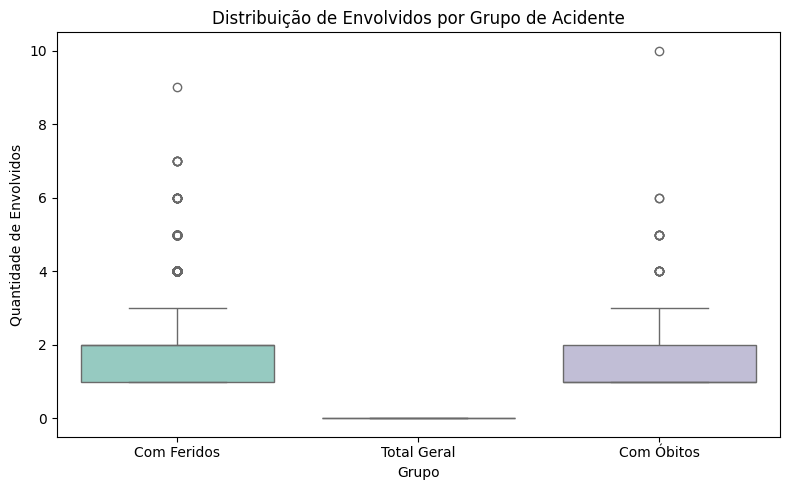

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='grupo', y='qtde_envolvidos', palette='Set3')
plt.title('Distribuição de Envolvidos por Grupo de Acidente')
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Envolvidos')
plt.tight_layout()
plt.show()

A presença de muitos outliers em qtde_feridosilesos e qtde_envolvidos indica que, embora a maioria dos acidentes envolva um número relativamente baixo de pessoas e feridos leves, há registros de acidentes com um número muito elevado de envolvidos e feridos.

Isso é típico em acidentes de grande escala, como colisões múltiplas em rodovias movimentadas ou acidentes com veículos de grande capacidade (ônibus, caminhões). Esses eventos são menos frequentes, mas impactam fortemente as estatísticas por conta da gravidade e do número de vítimas.

Esses outliers são importantes porque mostram que, apesar da maioria dos acidentes ser de menor porte, existem casos extremos que exigem atenção especial em termos de prevenção, resposta emergencial e políticas públicas.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

Gráfico de linhas da série temporal: total de acidentes por mês (agregado por ano)

<Figure size 1200x600 with 0 Axes>

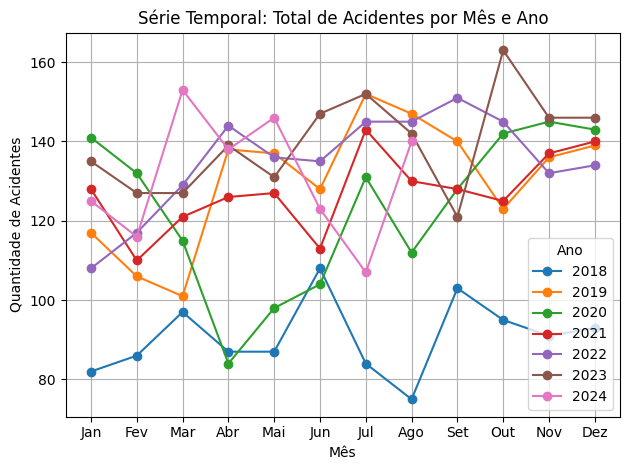

In [35]:
# Garantir conversão para datetime
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

# Criar colunas de ano e mês
dados['ano'] = dados['data_acidente'].dt.year
dados['mes'] = dados['data_acidente'].dt.month

# Agrupar por ano e mês, somando a quantidade de acidentes
acidentes_por_mes = dados.groupby(['ano', 'mes'])['qtde_acidente'].sum().reset_index()

# Pivotar para ter anos como colunas e meses como linhas
acidentes_pivot = acidentes_por_mes.pivot(index='mes', columns='ano', values='qtde_acidente')

# Plot da série temporal
plt.figure(figsize=(12, 6))
acidentes_pivot.plot(marker='o')
plt.title('Série Temporal: Total de Acidentes por Mês e Ano')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.grid(True)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

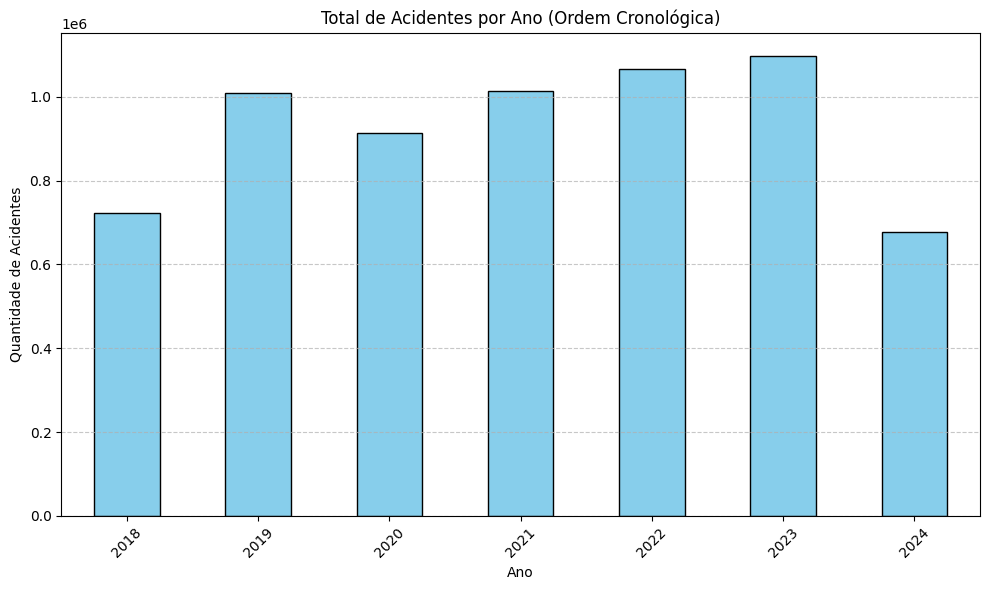

In [ ]:


# Garantir que 'data_acidente' está no formato datetime
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'], errors='coerce')

# Extrair o ano da data
dados_acidentes['ano'] = dados_acidentes['data_acidente'].dt.year

# Agrupar por ano, somando a quantidade de acidentes
acidentes_por_ano = dados_acidentes.groupby('ano')['qtde_acidente'].sum().sort_index()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
acidentes_por_ano.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajustes visuais
plt.title('Total de Acidentes por Ano (Ordem Cronológica)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Lembrando que em 2024 não temos os dados do ano todo e apenas até mês 8. Outra coisa importante de se notar pe que em 2020 com a pandemia deu uma reduzida e depois foi aumentando conforme as coisas foram normalizando.

Gráfico de barras empilhadas por tipo de acidente (tp_acidente) por mês

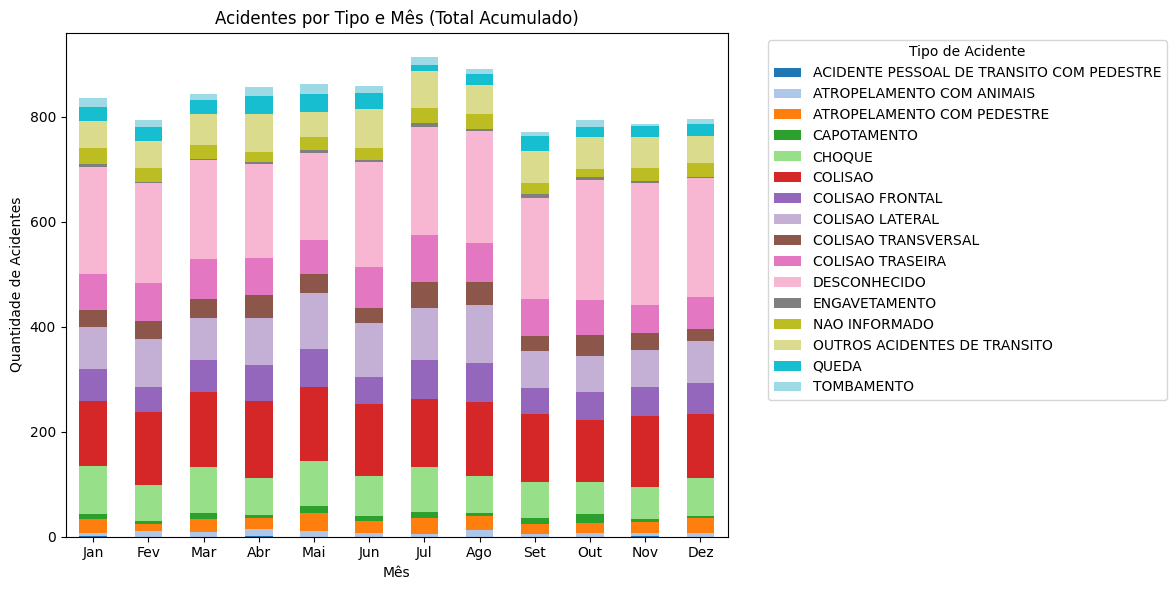

In [36]:
# Garantir que 'data_acidente' está no formato datetime
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

# Criar coluna de mês (caso ainda não exista)
dados['mes'] = dados['data_acidente'].dt.month

# Agrupar por mês e tipo de acidente, somando a quantidade
acidentes_tipo_mes = dados.groupby(['mes', 'tp_acidente'])['qtde_acidente'].sum().unstack(fill_value=0)

# Plot de barras empilhado
acidentes_tipo_mes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Título e rótulos
plt.title('Acidentes por Tipo e Mês (Total Acumulado)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
], rotation=0)
plt.legend(title='Tipo de Acidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Nota-se que colisão é o principal motivo de acidente.

Gráfico de barras empilhadas por condição meteorológica (cond_meteorologica) por mês

In [37]:
# Contar registros com condição meteorológica não informada
nao_informado = dados[dados['cond_meteorologica'].str.upper() == 'NAO INFORMADO'].shape[0]

print(f"Número de registros com condição meteorológica não informada: {nao_informado}")

Número de registros com condição meteorológica não informada: 5052


In [38]:
# Total de registros
total = dados.shape[0]

# Lista de valores considerados como "desconhecidos"
valores_desconhecidos = ['NAO INFORMADO', 'DESCONHECIDO', 'IGNORADO']

# Contar registros com condição meteorológica considerada desconhecida
nao_informado = dados['cond_meteorologica'].astype(str).str.upper().isin(valores_desconhecidos).sum()

# Calcular porcentagem
porcentagem = (nao_informado / total) * 100

# Exibir resultado
print(f"Número de registros com condição meteorológica desconhecida ou não informada: {nao_informado}")
print(f"Porcentagem de dados não informados ou desconhecidos: {porcentagem:.2f}%")

Número de registros com condição meteorológica desconhecida ou não informada: 5052
Porcentagem de dados não informados ou desconhecidos: 50.52%


Metade dos registros não possuem informação sobre as condições meteorológicas no momento dos acidentes. Isso representa uma limitação importante para qualquer tentativa de correlação entre clima e frequência de acidentes.
Essa alta taxa de ausência pode indicar:

Problemas no processo de coleta de dados pelas autoridades ou sistemas automatizados;

Falta de obrigatoriedade ou padronização no preenchimento dessa informação;

Despreparo ou baixa prioridade em registrar variáveis ambientais durante os atendimentos.

Portanto, qualquer análise sobre impacto de chuva, neblina ou tempo limpo deve ser interpretada com cautela, já que o conjunto de dados está incompleto e enviesado.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos em relação as quantidades. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

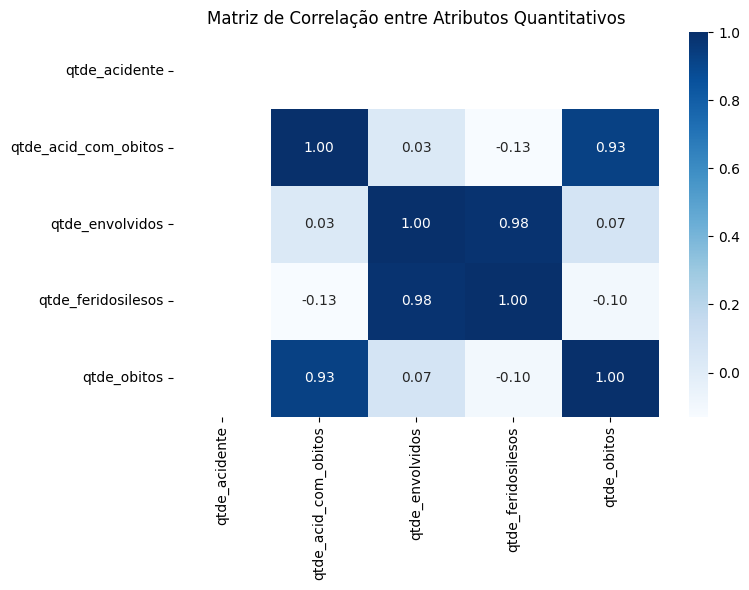

In [39]:
# Selecionar colunas quantitativas
colunas_quantitativas = [
    'qtde_acidente', 'qtde_acid_com_obitos',
    'qtde_envolvidos', 'qtde_feridosilesos', 'qtde_obitos'
]

# Gerar matriz de correlação
correlacao = dados[colunas_quantitativas].corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação entre Atributos Quantitativos')
plt.tight_layout()
plt.show()

Em relação a quantidade de acidentes, todos os valores comparados são altamente correlacionados.

## Tratamento de Valores Nulos
O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.


In [40]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Acidentes de Trânsito:")
dados.isnull().sum()

Valores nulos no dataset Acidentes de Trânsito:


,0
num_acidente,0
chv_localidade,0
data_acidente,0
uf_acidente,0
ano_acidente,0
mes_acidente,0
mes_ano_acidente,0
codigo_ibge,0
dia_semana,0
fase_dia,0


Como as colunas que apresentaram dados nulos, não são relevantes para a análise desse dataset, vou removê-las


In [42]:
# Lista das colunas que você quer remover
colunas_para_remover = ['bairro_acidente', 'latitude_acidente', 'longitude_acidente', 'end_acidente']

# Remover as colunas do DataFrame
dados = dados.drop(columns=colunas_para_remover)

# Verificar se foram removidas
print(dados.columns)

Index(['num_acidente', 'chv_localidade', 'data_acidente', 'uf_acidente',
       'ano_acidente', 'mes_acidente', 'mes_ano_acidente', 'codigo_ibge',
       'dia_semana', 'fase_dia', 'tp_acidente', 'cond_meteorologica',
       'num_end_acidente', 'cep_acidente', 'km_via_acidente', 'hora_acidente',
       'tp_rodovia', 'cond_pista', 'tp_cruzamento', 'tp_pavimento', 'tp_curva',
       'lim_velocidade', 'tp_pista', 'ind_guardrail', 'ind_cantcentral',
       'ind_acostamento', 'qtde_acidente', 'qtde_acid_com_obitos',
       'qtde_envolvidos', 'qtde_feridosilesos', 'qtde_obitos', 'grupo', 'ano',
       'mes'],
      dtype='object')


Agora vamos tratar os dados Desdonhecidos e não informados: Primeiramente vou transformar em NaN para poder fazer a exclusão.

In [43]:
import numpy as np

# Lista de valores considerados como desconhecidos
valores_desconhecidos = ['NAO INFORMADO', 'NÃO INFORMADO', 'DESCONHECIDO', 'IGNORADO', 'INDEFINIDO', 'SEM DADOS']

# Substituir em todas as colunas do DataFrame
dados_limpos = dados.replace(valores_desconhecidos, np.nan, regex=True)


In [45]:
# Remover registros com qualquer valor ausente
dados_limpos = dados_limpos.dropna()

# Verificar novo tamanho
print(f"Novo tamanho do dataset após limpeza: {dados_limpos.shape}")

Novo tamanho do dataset após limpeza: (1, 34)


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [46]:
# Definindo o alvo (target)
y = dados['qtde_acidente']

# Removendo a coluna alvo do conjunto de variáveis explicativas
X = dados.drop('qtde_acidente', axis=1)

In [47]:
from sklearn.model_selection import train_test_split

# Definir variável alvo
y = dados['qtde_acidente']

# Remover a variável alvo do restante dos dados
X = dados.drop('qtde_acidente', axis=1)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [48]:
# Exibir as dimensões dos conjuntos de treino e teste
print(f"Dimensões de X_train : {X_train.shape}")
print(f"Dimensões de X_test  : {X_test.shape}")
print(f"Dimensões de y_train : {y_train.shape}")
print(f"Dimensões de y_test  : {y_test.shape}")

Dimensões de X_train : (8000, 33)
Dimensões de X_test  : (2000, 33)
Dimensões de y_train : (8000,)
Dimensões de y_test  : (2000,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante. Fiz um histograma antes da normalização para comparar.



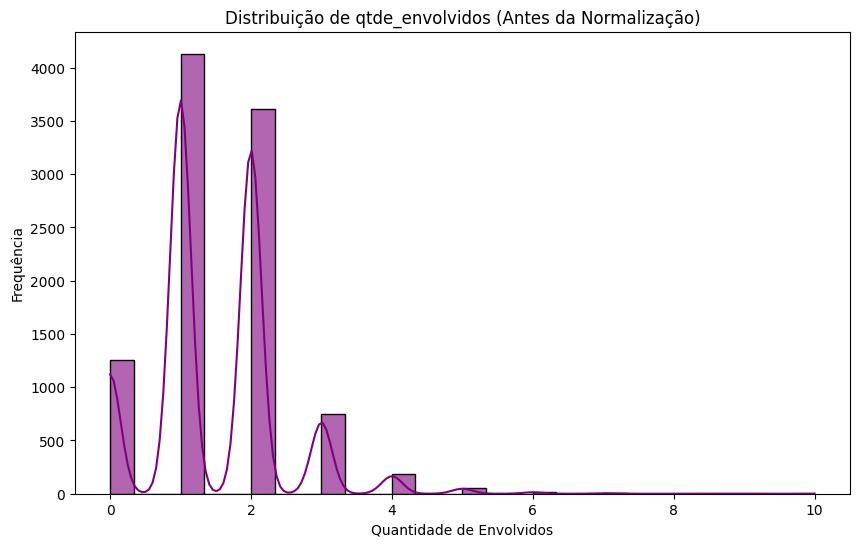

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['qtde_envolvidos'].dropna(), bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribuição de qtde_envolvidos (Antes da Normalização)')
plt.xlabel('Quantidade de Envolvidos')
plt.ylabel('Frequência')
plt.show()

antes da normalização o histograma mostra a distribuição da quantidade de envolvidos, com um eixo x representando essa quantidade e o eixo y a frequência (quantas vezes cada quantidade aparece).

O que chama atenção:

- A maioria dos dados está concentrada em valores  pequenos e se concentra até a metade.

- Há uma cauda longa para a direita, com algumas ocorrências de quantidades maiores, mas bem raras.

- O gráfico parece estar bem enviesado para a direita, típico de dados assimétricos.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separar variáveis explicativas e alvo
X = dados.drop(columns=['qtde_envolvidos'])  # Altere se precisar
y = dados['qtde_envolvidos']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instanciar o MinMaxScaler
scaler = MinMaxScaler()

# Selecionar apenas colunas numéricas
colunas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns

# Fazer cópias para evitar alteração direta no original
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Aplicar normalização (fit no treino e transform nos dois)
X_train_copy[colunas_numericas] = scaler.fit_transform(X_train_copy[colunas_numericas])
X_test_copy[colunas_numericas] = scaler.transform(X_test_copy[colunas_numericas])

# Criar DataFrames preservando índice e colunas
X_train_norm_df = pd.DataFrame(X_train_copy, columns=X_train.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_copy, columns=X_test.columns, index=X_test.index)

# Verificar o resultado
print("X_train normalizado:")
display(X_train_norm_df.head())

print("\nX_test normalizado:")
display(X_test_norm_df.head())

X_train normalizado:


,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_feridosilesos,qtde_obitos,grupo,ano,mes
9254,0.789345,MG3106705202402,2024-02-07,MG,1.000000,0.090909,0.090960,0.586159,QUARTA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.222222,0.0,Com Feridos,2024,2
1561,0.850649,MG3144300201808,2018-08-13,MG,0.000000,0.636364,0.636335,0.593252,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.222222,0.0,Com Feridos,2018,8
1670,0.098872,SP3548500202002,2020-02-07,SP,0.333333,0.090909,0.090923,0.669515,SEXTA-FEIRA,TARDE,...,NAO INFORMADO,SIM,DESCONHECIDO,0.0,0.0,0.222222,0.0,Com Feridos,2020,2
6087,0.132434,ES3205200201811,2018-11-28,ES,0.000000,0.909091,0.909050,0.604742,QUARTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.111111,0.0,Com Feridos,2018,11
6669,0.363009,ES3201209202110,2021-10-01,ES,0.500000,0.818182,0.818172,0.603989,SEXTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.111111,0.0,Com Feridos,2021,10



X_test normalizado:


,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_feridosilesos,qtde_obitos,grupo,ano,mes
6252,0.594310,PA1504208201802,2018-02-05,PA,0.000000,0.090909,0.090905,0.283807,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.000000,0.0,Total Geral,2018,2
4684,0.844298,DF5300108202303,2023-03-07,DF,0.833333,0.181818,0.181855,1.000000,TERCA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.444444,0.0,Com Feridos,2023,3
1731,0.758949,SP3529203201911,2019-11-18,SP,0.166667,0.909091,0.909059,0.665874,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,DESCONHECIDO,0.0,0.0,0.111111,0.0,Com Feridos,2019,11
4742,0.307209,SC4205407202408,2024-08-17,SC,1.000000,0.636364,0.636389,0.793457,SABADO,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.111111,0.0,Com Feridos,2024,8
4521,0.279029,MG3118601202309,2023-09-11,MG,0.833333,0.727273,0.727285,0.588403,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,0.0,0.111111,0.0,Com Feridos,2023,9


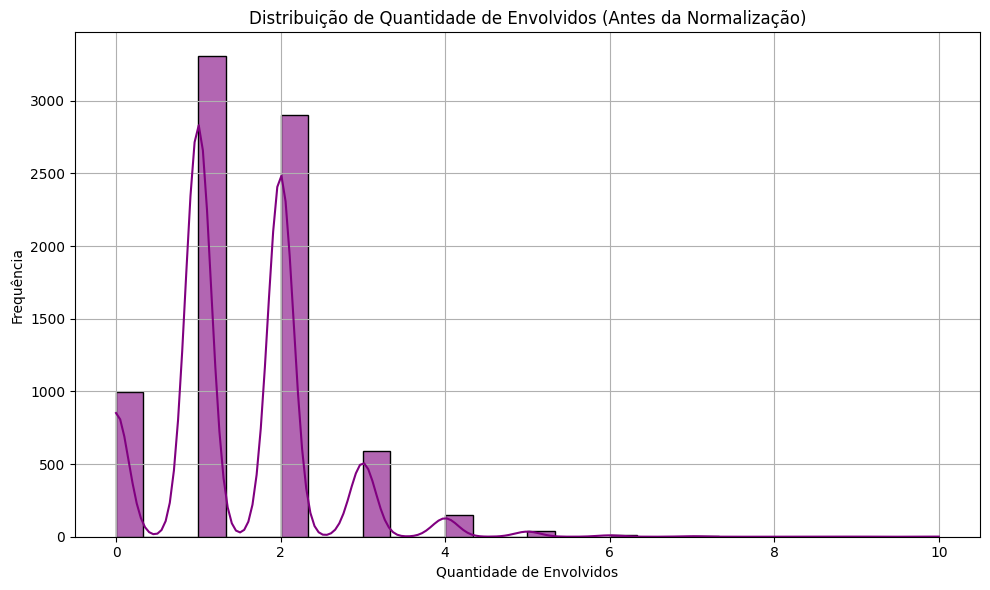

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar histograma com curva KDE para y_train (qtde_envolvidos)
plt.figure(figsize=(10, 6))
sns.histplot(y_train.dropna(), bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribuição de Quantidade de Envolvidos (Antes da Normalização)')
plt.xlabel('Quantidade de Envolvidos')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

Histograma original: As distribuições podem mostrar grandes picos para valores muito altos (representando muitos acidentes com poucos envolvidos), enquanto a maioria dos dados estará concentrada em valores pequenos.

Histograma normalizado: A normalização transforma todos os valores para o intervalo [0, 1], fazendo com que a distribuição fique mais concentrada, pois a variação de valores entre os dados diminui. O eixo X estará agora entre 0 e 1, e a forma da distribuição ficará mais comprimida.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [52]:
from sklearn.preprocessing import StandardScaler

# Instanciar o scaler
scaler_std = StandardScaler()

# Ajustar e transformar apenas as colunas numéricas
X_train[colunas_numericas] = scaler_std.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler_std.transform(X_test[colunas_numericas])

# Criar novos DataFrames com os dados padronizados
X_train_std_df = pd.DataFrame(X_train, columns=X_train.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test, columns=X_test.columns, index=X_test.index)

# Visualizar as primeiras linhas
print("X_train padronizado:")
display(X_train_std_df.head())

print("\nX_test padronizado:")
display(X_test_std_df.head())

X_train padronizado:


,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_feridosilesos,qtde_obitos,grupo,ano,mes
9254,1.030803,MG3106705202402,2024-02-07,MG,1.597600,-1.304673,-1.304592,-0.571896,QUARTA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,0.582619,-0.133293,Com Feridos,2024,2
1561,1.243901,MG3144300201808,2018-08-13,MG,-1.608957,0.459690,0.459604,-0.531718,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,0.582619,-0.133293,Com Feridos,2018,8
1670,-1.369352,SP3548500202002,2020-02-07,SP,-0.540104,-1.304673,-1.304710,-0.099745,SEXTA-FEIRA,TARDE,...,NAO INFORMADO,SIM,DESCONHECIDO,0.0,-0.145567,0.582619,-0.133293,Com Feridos,2020,2
6087,-1.252688,ES3205200201811,2018-11-28,ES,-1.608957,1.341871,1.341790,-0.466633,QUARTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,-0.481282,-0.133293,Com Feridos,2018,11
6669,-0.451186,ES3201209202110,2021-10-01,ES,-0.005678,1.047811,1.047816,-0.470898,SEXTA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,-0.481282,-0.133293,Com Feridos,2021,10



X_test padronizado:


,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,...,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_feridosilesos,qtde_obitos,grupo,ano,mes
6252,0.352842,PA1504208201802,2018-02-05,PA,-1.608957,-1.304673,-1.304768,-2.284502,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,-1.545183,-0.133293,Total Geral,2018,2
4684,1.221825,DF5300108202303,2023-03-07,DF,1.063174,-1.010612,-1.010559,1.772218,TERCA-FEIRA,MANHA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,2.710421,-0.133293,Com Feridos,2023,3
1731,0.925143,SP3529203201911,2019-11-18,SP,-1.074531,1.341871,1.341820,-0.120368,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,DESCONHECIDO,0.0,-0.145567,-0.481282,-0.133293,Com Feridos,2019,11
4742,-0.645150,SC4205407202408,2024-08-17,SC,1.597600,0.459690,0.459780,0.602299,SABADO,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,-0.481282,-0.133293,Com Feridos,2024,8
4521,-0.743107,MG3118601202309,2023-09-11,MG,1.063174,0.753750,0.753813,-0.559183,SEGUNDA-FEIRA,TARDE,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.0,-0.145567,-0.481282,-0.133293,Com Feridos,2023,9


O que eu fiz:

✅ Tratei nulos corretamente (inclusive "desconhecido" e "não informado")

✅ Normalizei (0 a 1)

✅ Padronizei (média 0, desvio 1) as colunas numéricas

✅ Colunas categóricas ficaram separadas, prontas para seguir na análise.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



Professor, a mais eu poderia fazer:


📄 Importar dados (CSV do Drive)

   ↓

🔎 Explorar dados iniciais
   - Ver shape
   - Ver tipos (dtypes)
   - Ver nulos e "desconhecido"

   ↓

🧹 Tratar dados nulos
   - Remover colunas irrelevantes
   - Substituir "desconhecido"/"não informado" por NaN
   - Decidir se remove linhas ou preenche

   ↓

⚙️ Conversão de tipos
   - Garantir que numéricas sejam float/int
   - Categóricas como object

   ↓

🔢 Normalização (0 a 1)

   ↓

📊 Padronização (média 0, desvio 1) das numéricas

   ↓

🎯 Engenharia inicial de features (opcional para MVP)
   - Criar hora agrupada
   - Criar final de semana
   (Se incluir, apenas até criação, sem modelar!)

   ↓

✅ Dataset pré-processado pronto

   ↓
   
✨ FIM do MVP (pronto para modelagem em futuros MVPs)


Professor, nessa etapa do projeto, eu trabalhei principalmente no pré-processamento e na organização do banco de dados de acidentes de trânsito no Brasil, que cobre o período de 2018 a 2023. A ideia foi justamente preparar esses dados para análises futuras, como modelagem estatística e aprendizado de máquina, que a gente vai ver nos próximos MVPs.

Comecei levantando algumas perguntas e, ao longo da análise, fui encontrando as seguintes respostas:

✅ O número de acidentes aumentou ao longo dos anos?
Sim, há uma tendência de crescimento. Só não foi possível verificar com clareza os dados de 2024, pois ainda não estavam completos até dezembro, que costuma ser o mês com mais ocorrências.

✅ Quais estados têm os maiores índices de acidentes e de acidentes com óbitos?
Minas Gerais e São Paulo lideram o número total de acidentes — esse resultado me surpreendeu, pois eu achava que SP estaria em primeiro. Já em relação aos acidentes com mortes, São Paulo é o estado com mais registros, seguido de Minas.

✅ Quais os tipos de acidente mais frequentes?
Colisão e colisão lateral são os mais comuns.

✅ Quais dias da semana têm mais acidentes?
Sexta e sábado lideram. Isso sugere que políticas de prevenção e fiscalização deveriam ser reforçadas nesses dias, especialmente devido ao possível aumento no consumo de bebida alcoólica nos fins de semana.

✅ As condições meteorológicas influenciam?
Minha análise foi inconclusiva. Porém, como a maioria dos acidentes acontece em rodovias municipais, geralmente em áreas urbanas e nos fins de semana, acredito que o clima tenha uma influência menor e não seja o fator principal.

✅ Quais rodovias concentram mais acidentes?
Rodovias municipais, seguidas das estaduais e federais. Isso indica que muitos acidentes ocorrem dentro dos centros urbanos.

✅ Qual a proporção de envolvidos, feridos e óbitos?
Mais de 98% dos envolvidos são feridos ilesos. Óbitos representam uma pequena parcela, mas com grande impacto social.

Durante o tratamento, ficou claro que os finais de semana e os centros urbanos são os pontos que mais exigem atenção por parte das autoridades. Também foi possível identificar padrões nos tipos de acidente e nas vias mais perigosas, o que pode ajudar na formulação de políticas públicas mais eficazes.

No geral, foi muito gratificante ver que só com o pré-processamento já conseguimos extrair vários insights. Consegui organizar as variáveis, tratar valores nulos, normalizar e padronizar os dados, preparando um dataset limpo e pronto para as próximas etapas.

Pessoalmente, foi uma experiência muito rica. Conversei com colegas, troquei ideias, tirei dúvidas e percebi o quanto evoluí desde o primeiro MVP. Aprendi bastante sobre o processo de tratamento de dados e, principalmente, sobre como os dados podem nos ajudar a entender problemas reais. Estou muito feliz com tudo que estou aprendendo na pós e animada para continuar desenvolvendo as próximas fases.